# SAS On-the-Job | Part 2
## Role: Data Analyst within the Department of Health and Human Services

#### The Story Continues
In Part 1, we did a nice job of better understanding the objective at hand - and our data.  We used a variety of tools - including Python, SQL, and SAS - to perform an exploratory data analysis and now can explore data at both the state and aggregated U.S. analysis .  The (data) world is our oyster... yay!<br>

In this section, we'll take a deeper dive into the trends in unemployment and labor force participation for prime-aged women aged 25-54 in the United States.  In particular, this section has three objectives.  <br>

•	Plot aggregated U.S. trends over time | by demographic groups | by quarter. <br>
•	Examine state-level unemployment rates and labor force participation rates | by year. <br>
•	Create data sets to be used in Part 3 of our analysis. <br>

## Time Series Plots using SAS GPLOT and SAS Macros

### Task 1: Examine U.S. Trends over Time

Let's get right to it.  With our first task, let’s use GPLOT to explore trends in unemployment rates and labor force participation rates  in the U.S. In particular, let's look at the trends by *Race and Ethnicity*, *Education Level*, and *Child Status*.  Oh, and you'll gain exposure to SAS Macros, so that you can see how macros greatly simplify the amount of repetitive code that needs to be written.

#### Assign the library to pull the data

We'll again read and write data to our SAS Viya environment. So, let's assign a link to that location on our drive.

In [1]:
libname acs "/home/student/S23HSRP";

SAS server started using Context SAS Studio compute context with SESSION_ID=919f3744-1c5d-4210-8a80-cb5afdc1e022-ses0000
12   ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
12 ! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml.htm
13   
14   libname acs "/home/student/S23HSRP";
NOTE: Libref ACS was successfully assigned as follows: 
      Engine:        V9 
      Physical Name: /home/student/S23HSRP
15   ods html5 (id=saspy_internal) close;ods listing;
16   




#### Setup SAS Code for Pretty Graphs
One advantage to coding is that you can specify the exact options that you'd like to see in your graphs. One downside to coding is that you need to specify the exact options in your graph... otherwise you'll be stuck with some potentially less than ideal defaults. So, let's adjust the graph setting to something that will work for us.

In [2]:
*-------------------------------------------------------------------------------------*
| 	   						  Examine Current Trends 								  | 
|						  Part I: Adjust Graph Settings								  |
*-------------------------------------------------------------------------------------*;

**********************************************  Assign colors and symbols to plot lines;
symbol1 interpol=join line=1 	color=bl 	;
symbol2 interpol=join line=2	color=b 	;
symbol3 interpol=join line=3	color=br 	;
symbol4 interpol=join line=4	color=g 	;
symbol5 interpol=join line=5	color=p 	;

**********************************************  Format Axis;
legend1 position=(top center inside)label=none mode=share frame;

17   ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
17 ! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml1.htm
18   
19   *-------------------------------------------------------------------------------------*
20   | 	   						  Examine Current Trends 								  |
21   |						  Part I: Adjust Graph Settings								  |
22   *-------------------------------------------------------------------------------------*;
23   
24   **********************************************  Assign colors and symbols to plot lines;
25   symbol1 interpol=join line=1 	color=bl 	;
26   symbol2 interpol=join line=2	color=b 	;
27   symbol3 interpol=join line=3	color=br 	;
28   symbol4 interpol=join line=4	color=g 	;
29   symbol5 interpol=join line=5	color=p 	;
30   
31   **********************************************  Format Axis;
32   legend1 position=(top center inside)label=none mode=share frame;
33   ods html5 (id=s

#### U.S. Plots for Unemployment and Labor Force Participation | By Race/Ethnicity, Education Level, and Child Status | Quarterly
Ready or not - it's SAS Macro loop time! We'll use the PROC GPLOT data below to produce six charts of labor supply trends, over time.

In [3]:
*-------------------------------------------------------------------------------------*
|			 				Part II: Macro Loops									  |
*-------------------------------------------------------------------------------------*;

************************************  Define Variable List to Simplify Coding ;
%macro hilfe(from,to,by,var1,varlist2,title);

	***********************************************  Format axis for current range ;
	axis2 	order=(&from to &to by &by ) offset=(0,0) label=none minor=(n=1);


	**********************************************  Overlay Plot ;
	title3 h=1.75pct &title;
	proc gplot data=acs.covid_labor_supply_us;
	   plot ( &var1 	)	* YearQuarter 
	   		( &varlist2 ) 	* YearQuarter 
			 /	overlay
				legend=legend1
		        vaxis=axis2
		        vref=&from to &to by .05
		        lvref=2;
	run;
	quit;

%mend;


**************************************************  Unemployment ;
%hilfe(0,.20,.02,UE_Women,UE_BlackWomen UE_HispanicWomen UE_WhiteWomen UE_OtherWomen,			"Unemployment Analysis | By Race and Ethnicity");
%hilfe(0,.20,.02,UE_Women,UE_Women_LTHS UE_Women_HS UE_Women_SCollege UE_Women_CollegeP,		"Unemployment Analysis | By Education Level");
%hilfe(0,.20,.02,UE_Women,UE_Women_NoKids UE_Women_OlderKids UE_Women_YoungKids,				"Unemployment Analysis | By Child Status");


**************************************************  Labor Force Participation ;
%hilfe(0.6,1,.05,LFP_Women,LFP_BlackWomen LFP_HispanicWomen LFP_WhiteWomen LFP_OtherWomen,		"Labor Force Participation Analysis | By Race and Ethnicity");
%hilfe(0.6,1,.05,LFP_Women,LFP_Women_LTHS LFP_Women_HS LFP_Women_SCollege LFP_Women_CollegeP,	"Labor Force Participation Analysis | By Education Level");
%hilfe(0.6,1,.05,LFP_Women,LFP_Women_NoKids LFP_Women_OlderKids LFP_Women_YoungKids,			"Labor Force Participation Analysis | By Child Status");


Notice the effect of COVID on these variables?  Unemployment rates were greatly affected by the COVID19 pandemic - particularly in the period starting in Q2 of 2020. Women of all demographic groups were affected by the COVID19 lockdowns, but higher-education women didn't experience the same spike in unemployment (likely because they could still do their job remotely).  Interestingly, there really wasn't much variation in UE rates by child status - and the UE levels have returned - essentially - to the same level they were pre-COVID.

Let's pause on that last point a bit. UE being relatively unaffected by child status during the pandemic - and now being essentially at the same level as before the pandemic - would mean that HHS leadership shouldn't have to push for additional supports for working mothers. At least in terms of the unemployment rate.

But, labor force participation rate is another (and perhaps better) measure of labor supply. LFP essentially measures individuals’ desire to be part of the labor force, whether they have a job or not. In the last chart, we see that women without children have the highest LFP rates.  And women with young children (that is, those less than 5 years old) have the lowest levels of LFP. That all makes sense. The interesting part is at the end - starting in roughly Q1 of 2022. To me, it appears that LFP rates have rebounded to where they were before the pandemic... and might be slightly higher.

Again, for this policy analyst, I see no need for targeted policies, given that rates are either at or above where they were before the pandemic.  But, you're the new analyst - what other interesting trends do you notice?

#### Produce Summary Tables of Underlying Data
To round out this section, let's ensure that the data are what we expect them to be. We can do this with a simple PROC PRINT statement in SAS. And this can also be thought of as the "show your work" portion of the programming.

In [4]:
*-------------------------------------------------------------------------------------*
|		 	   						Backup Tables							  		  | 
*-------------------------------------------------------------------------------------*;

%macro backup(var,title);
	title3 h=1.75pct &title;
	proc print data=acs.covid_labor_supply_us noobs label;
		var YearQuarter ue_: ;
	run;
%mend;

%backup(ue_:,"Backup Tables - Unemployment Rates");
%backup(lfp_:,"Backup Tables - Labor Force Participation Rates";);


YearQuarter,Unemployment Rate,Black Women,Hispanic Women,White Women,All Other Women,EDUC < HS,EDUC = HS,Some College,College +,No Children,Older Children,Young Children
2015Q1,4.7%,8.7%,6.4%,3.5%,4.1%,11.7%,6.0%,5.5%,2.5%,4.5%,4.7%,5.4%
2015Q2,4.6%,7.5%,6.3%,3.5%,4.1%,11.2%,6.3%,4.6%,2.5%,4.5%,4.3%,5.4%
2015Q3,4.9%,7.7%,6.8%,3.8%,4.5%,12.1%,6.9%,4.6%,3.0%,4.6%,4.9%,5.6%
2015Q4,4.3%,7.5%,6.1%,3.1%,4.2%,8.9%,6.1%,4.6%,2.5%,4.1%,4.1%,5.0%
2016Q1,4.4%,8.3%,5.5%,3.3%,4.6%,10.1%,6.5%,4.6%,2.5%,4.4%,4.3%,5.0%
2016Q2,4.1%,6.5%,5.4%,3.2%,4.5%,10.0%,5.9%,4.2%,2.3%,4.0%,4.0%,4.7%
2016Q3,4.7%,7.3%,5.6%,3.7%,5.5%,10.1%,5.9%,5.0%,3.1%,4.8%,4.4%,5.0%
2016Q4,4.1%,6.8%,5.1%,3.1%,4.2%,10.0%,6.1%,4.0%,2.3%,4.2%,3.9%,4.4%
2017Q1,4.1%,7.2%,5.3%,3.2%,3.5%,10.1%,6.2%,4.1%,2.4%,4.0%,4.1%,4.5%
2017Q2,3.8%,6.4%,4.6%,3.0%,3.9%,7.7%,5.6%,4.3%,2.2%,3.7%,3.9%,4.0%


Data look legit to me! And, tables like this - though long - can be a great way to spot outliers.  Notice the cluster around the time of the pandemic?

## Task 2 | Examine State-Level UE and LFP Estimates | Yearly
The United States is a very large and diverse country. Economic conditions in Montana might not be the same as they are in North Carolina. And that's the beauty of Census Data - we can parse out those individual trends and examine them over time. Let's make a few data modifications and then produce some PROC SGPANEL plots.

#### First Step: Collapse to State-Year Data Using SQL
We'll need to aggregate the data to the state + year level.  As shown in Part 1, this can be done very succinctly using the powerful SQL language. Let's see how we can collapse our data in a single PROC SQL step - all while producing weighted (and more accurate) estimates of UE and LFP.

In [5]:
*-------------------------------------------------------------------------------------*
|    	   						  Collapse Data 									  | 
|	                    	Produce State-Level Estimates          	          		  |
*-------------------------------------------------------------------------------------*;

********************************************************  By State ;
proc sql;
	create 	table acs.covid_labor_supply2 as 
	select	distinct state_fip, state_name, 
            year(yearquarter) as Year format 9.,
			
/*******************************************************************  Labor Force Status | All  */
			sum( ( unemp=1 ) * WTFINL ) 											/ sum( ( in_LF=1 ) *   	WTFINL )									as UE_Women				label="Unemployment Rate"	format percent9.1 		,
			sum( ( in_LF=1 ) * WTFINL ) 											/ sum(  				WTFINL )									as LFP_Women			label="LFP Rate"			format percent9.1 		,


/*******************************************************************  Labor Force Status | By Education  */

			/*******************************************************  Unemployment */
			sum( ( educ_ltd="High School Diploma" ) * ( unemp=1 ) * WTFINL ) 		/ sum( ( educ_ltd="High School Diploma" ) * ( in_LF=1 ) * WTFINL )	as UE_Women_HS			label="EDUC <= HS" 		format percent9.1 		,
			sum( ( educ_ltd="Some College" ) * ( unemp=1 ) * WTFINL ) 				/ sum( ( educ_ltd="Some College" ) * ( in_LF=1 ) * WTFINL ) 		as UE_Women_SCollege	label="Some College"	format percent9.1 		,
			sum( ( educ_ltd="College +" ) * ( unemp=1 ) * WTFINL ) 					/ sum( ( educ_ltd="College +" ) * ( in_LF=1 ) * WTFINL ) 			as UE_Women_CollegeP	label="College +" 		format percent9.1 		,

			/*******************************************************  LFP */
			sum( ( educ_ltd="High School Diploma" ) * ( in_LF=1 ) * WTFINL ) 		/ sum( ( educ_ltd="High School Diploma" ) * WTFINL ) 				as LFP_Women_HS			label="EDUC <= HS" 		format percent9.1 		,
			sum( ( educ_ltd="Some College" ) * ( in_LF=1 ) * WTFINL ) 				/ sum( ( educ_ltd="Some College" ) * WTFINL ) 						as LFP_Women_SCollege	label="Some College" 	format percent9.1 		,
			sum( ( educ_ltd="College +" ) * ( in_LF=1 ) * WTFINL ) 					/ sum( ( educ_ltd="College +" ) * WTFINL ) 							as LFP_Women_CollegeP	label="College +" 		format percent9.1 		,


/*******************************************************************  Labor Force Status | By Child Status  */

			/*******************************************************  Unemployment */
			sum( ( child_status="No Children" ) * ( unemp=1 ) * WTFINL ) 			/ sum( ( child_status="No Children" ) * ( in_LF=1 ) * WTFINL ) 		as UE_Women_NoKids		label="No Children" 	format percent9.1 		,
			sum( ( child_status="Older Children" ) * ( unemp=1 ) * WTFINL ) 		/ sum( ( child_status="Older Children" ) * ( in_LF=1 ) * WTFINL ) 	as UE_Women_OlderKids	label="Older Children" 	format percent9.1 		,
			sum( ( child_status="Child < 5" ) * ( unemp=1 ) * WTFINL ) 				/ sum( ( child_status="Child < 5" ) * ( in_LF=1 ) * WTFINL ) 		as UE_Women_YoungKids	label="Young Children"	format percent9.1 		,

			/*******************************************************  LFP */
			sum( ( child_status="No Children" ) * ( in_LF=1 ) * WTFINL ) 			/ sum( ( child_status="No Children" ) * WTFINL ) 					as LFP_Women_NoKids		label="No Children" 	format percent9.1 		,
			sum( ( child_status="Older Children" ) * ( in_LF=1 ) * WTFINL ) 		/ sum( ( child_status="Older Children" ) * WTFINL ) 				as LFP_Women_OlderKids	label="Older Children" 	format percent9.1 		,
			sum( ( child_status="Child < 5" ) * ( in_LF=1 ) * WTFINL ) 				/ sum( ( child_status="Child < 5" ) * WTFINL ) 						as LFP_Women_YoungKids	label="Young Children"	format percent9.1 		


	from 	acs.acs_2015_2022
	group	by 1,2,3 
	order	by 1,2,3 ;
quit;


95   ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
95 ! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml4.htm
96   
97   *-------------------------------------------------------------------------------------*
98   |    	   						  Collapse Data 									  |
99   |	                    	Produce State-Level Estimates          	          		  |
100  *-------------------------------------------------------------------------------------*;
101  
102  ********************************************************  By State ;
103  proc sql;
104  	create 	table acs.covid_labor_supply2 as
105  	select	distinct state_fip, state_name,
106              year(yearquarter) as Year format 9.,
107  			
108  /*******************************************************************  Labor Force Status | All  */
109  			sum( ( unemp=1 ) * WTFINL ) 											/ sum( ( in_LF=1 ) *   	WTFINL )									as UE_Women				label="Un

I still think that SQL trick is cool.  Notice how we turn select variables into 1/0 variables and then pass them through our SQL collapsing equation. For example, the code ( child_status="No Children" ) resolves to 1 if the child status is "No Children" and 0 otherwise.  So, we essentially have a bunch of 1s and 0s multiplied together on a line-by-line basis, with a weight, which we then aggregate up to a state-year level. Now that's cool!

#### Transpose Data to Prepare for SGPANEL Plots
The data aren't quite where they need to be for the SGPANEL plots. But we can do that easily with a little arranging/rearranging of the data.

In [6]:
proc transpose data=acs.covid_labor_supply2 out=tran1 (rename=(_label_=Group));
	by state_fip state_name year ;
run;


data 	ue 	(keep=state_fip state_name year group ue_rate)
		lfp (keep=state_fip state_name year group lfp_rate);
	set tran1 ;

	label 	group="Group" ;

	if 	index(_name_,"UE_")=1 then do;
		UE_Rate 		= col1 ;
		label 	UE_Rate = "Unemployment Rate" ;
		format 	UE_Rate percent9.1 ;
		output	ue ;
	end;

	else if index(_name_,"LFP_")=1 then do;
		LFP_Rate 		= col1 ;
		label 	LFP_Rate= "Labor Force Participation Rate" ;
		format 	LFP_Rate percent9.1 ;
		output	lfp ;
	end;
run;

146  ods listing close;ods html5 (id=saspy_internal) options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on /
146! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: sashtml5.htm
147  
148  proc transpose data=acs.covid_labor_supply2 out=tran1 (rename=(_label_=Group));
149  	by state_fip state_name year ;
150  run;

NOTE: There were 408 observations read from the data set ACS.COVID_LABOR_SUPPLY2.
NOTE: The data set WORK.TRAN1 has 5712 observations and 6 variables.
NOTE: PROCEDURE TRANSPOSE used (Total process time):
      real time           0.01 seconds
      user cpu time       0.01 seconds
      system cpu time     0.01 seconds
      memory              2599.71k
      OS Memory           23180.00k
      Timestamp           08/09/2023 01:47:55 PM
      Step Count                        12  Switch Count  1
      Page Faults                       0
      Page Reclaims                     85
      Page Swaps                        0
      Voluntary Context S

Now the data are prepared - and the way we need them to be for the SGPANEL plots. Onward!

#### Unemployment Rates
Let's first examine the unemployment rates, by education level and then by child status. And you know the follow-up questions: (1) what looks interesting and (2) are there any noticeable trends by child status over time?


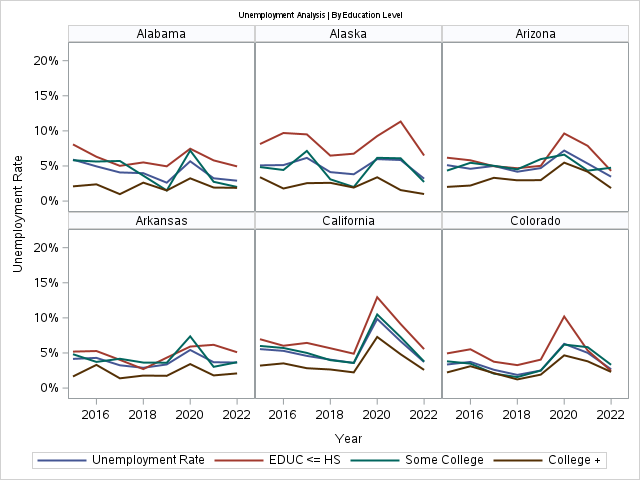
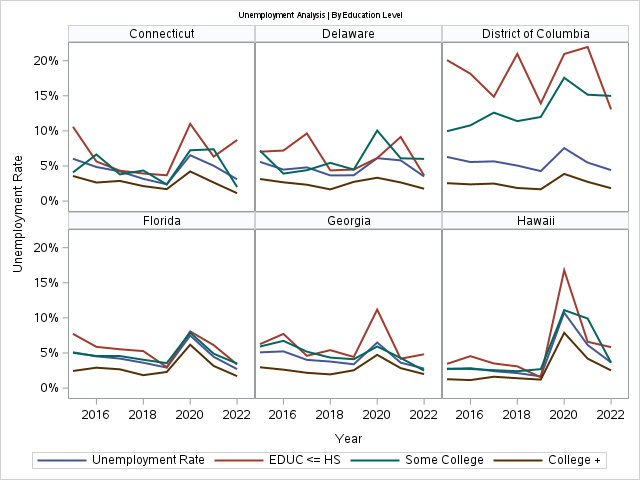
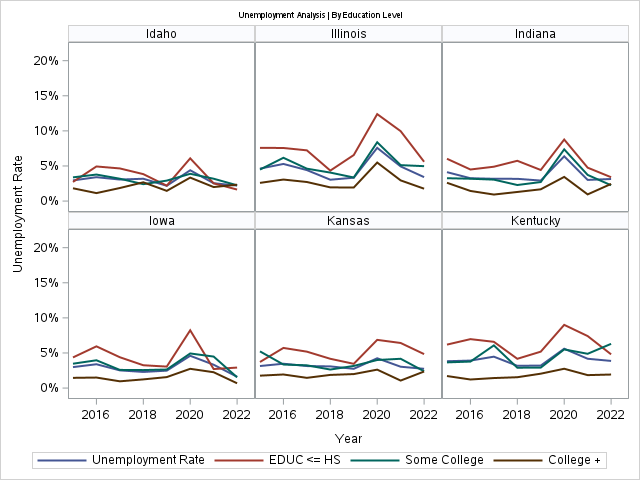
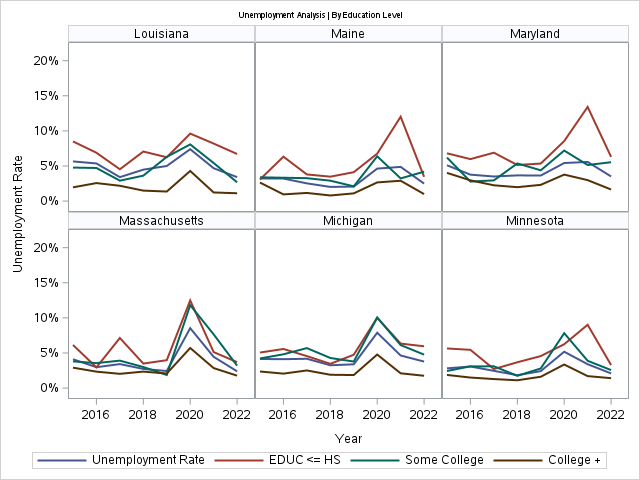
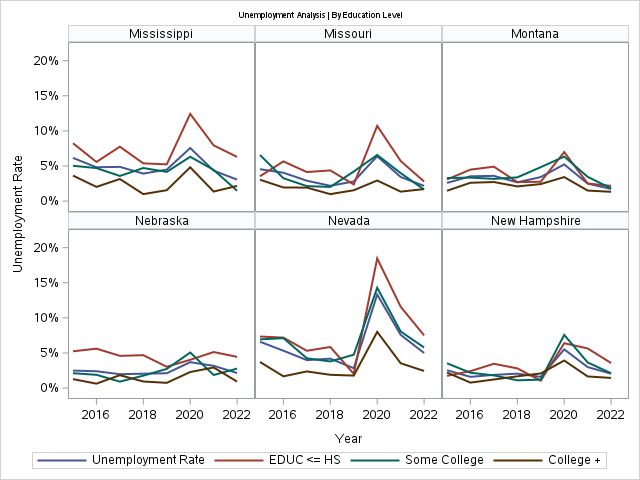
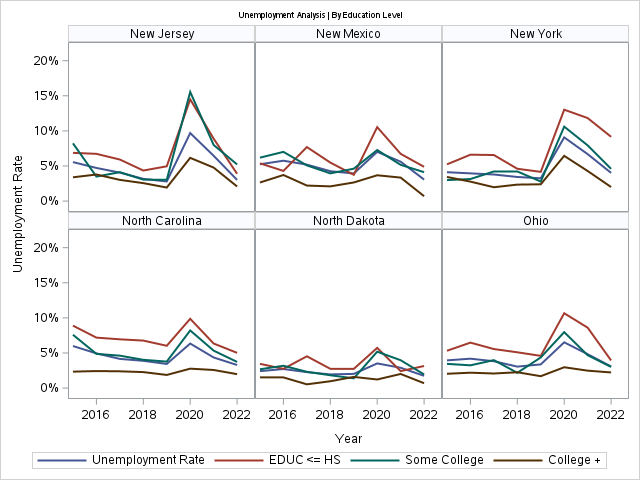
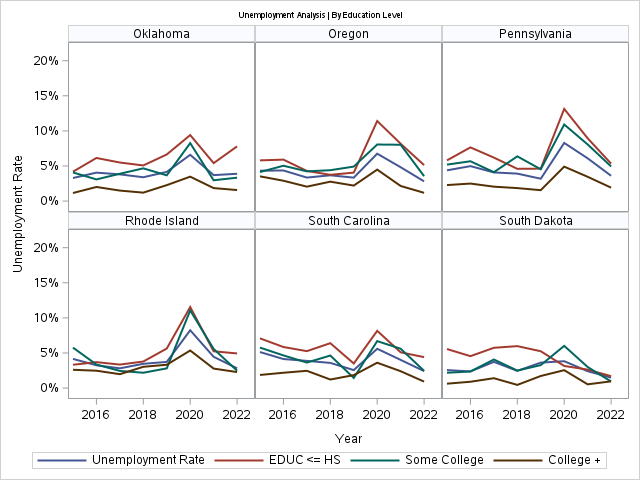
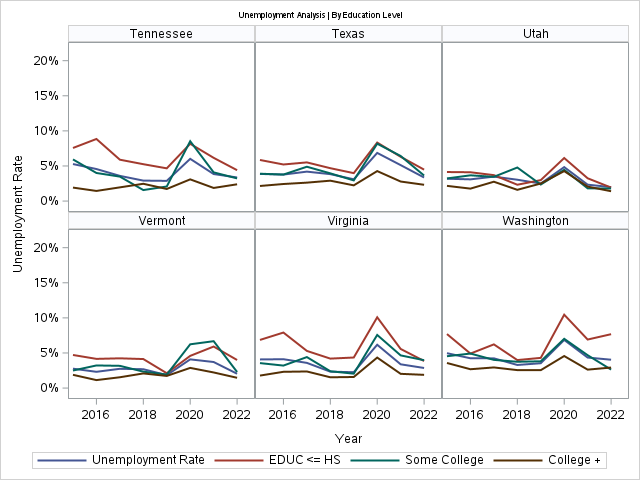
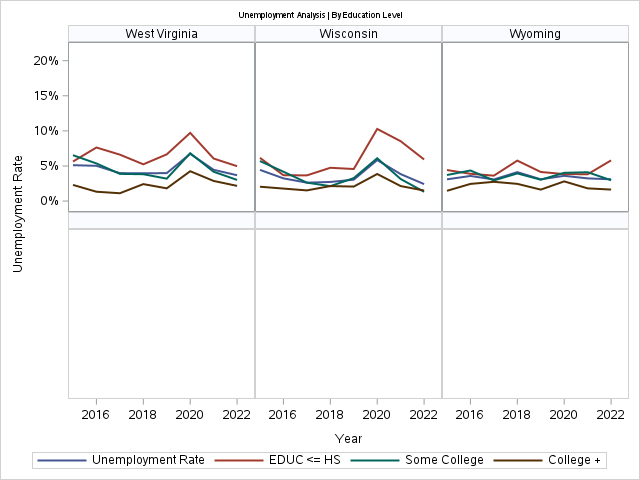
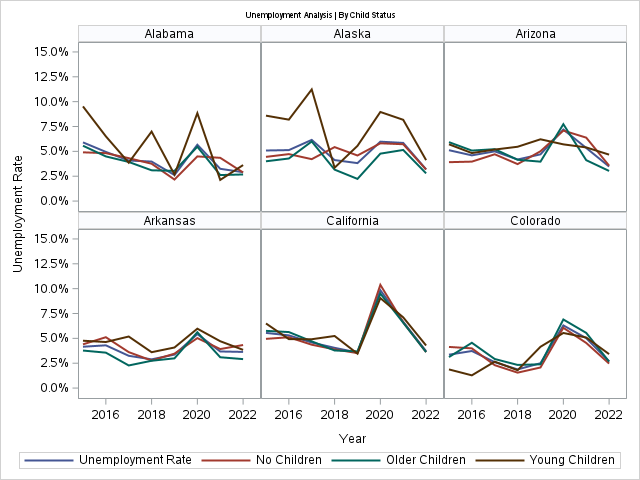
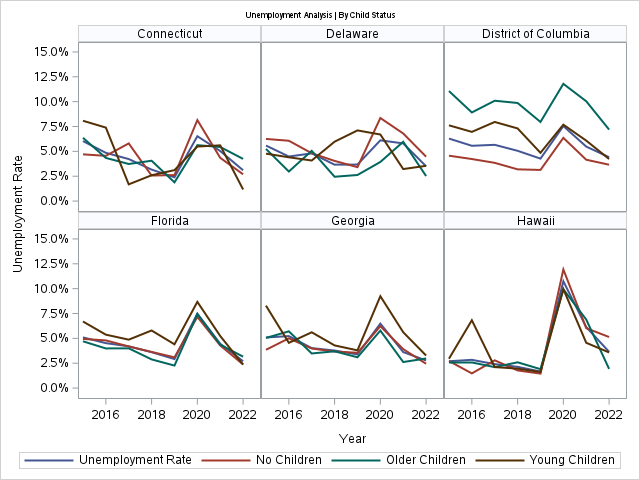
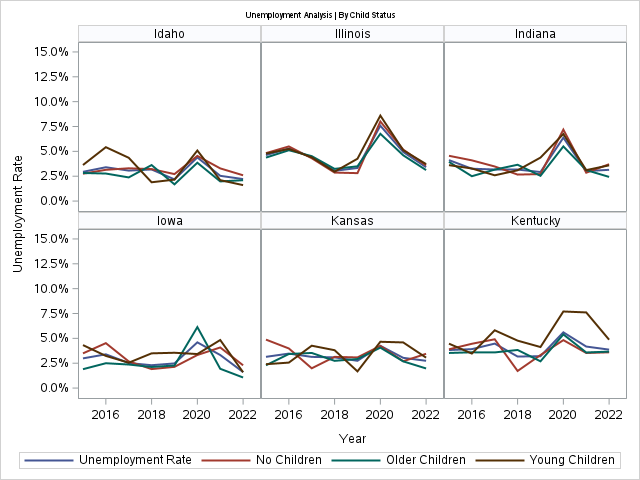
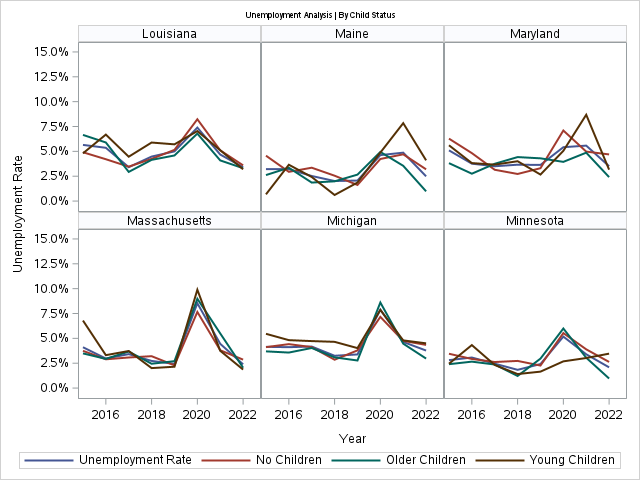
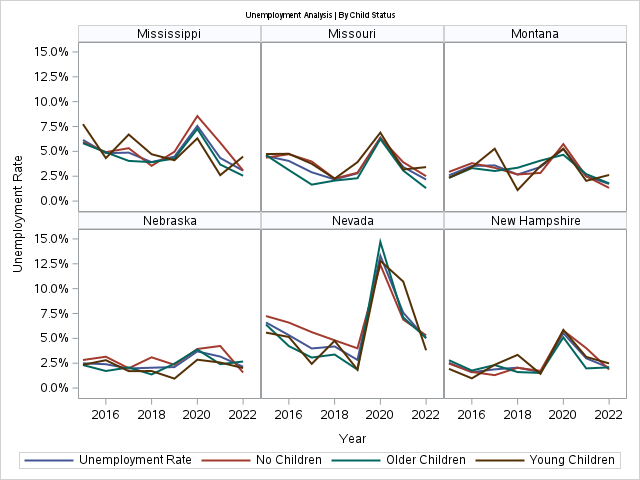
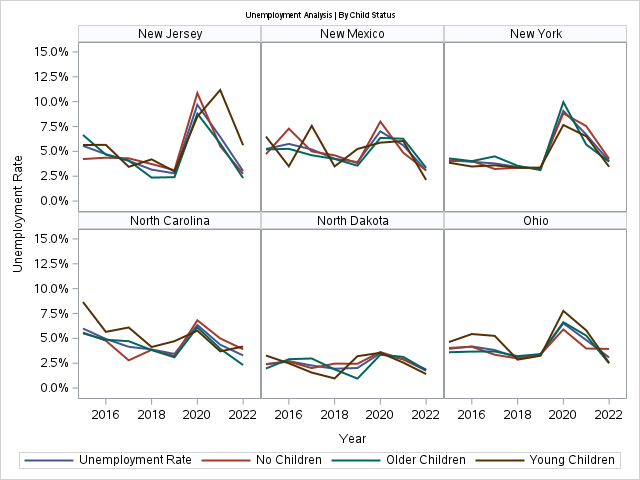
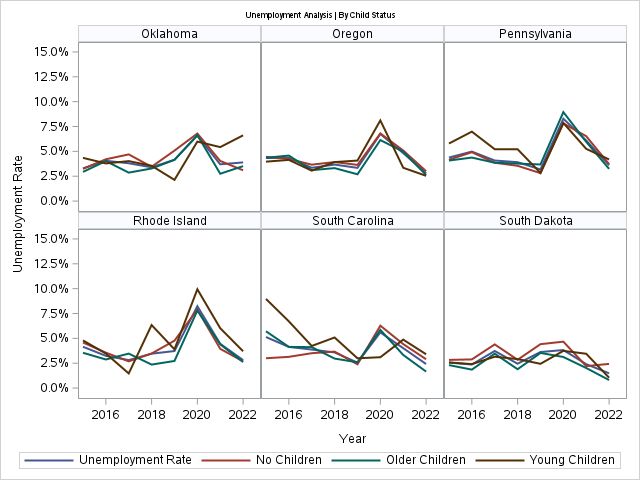
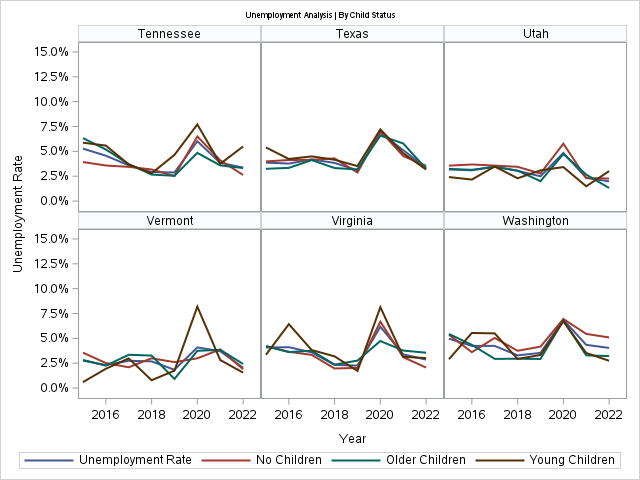
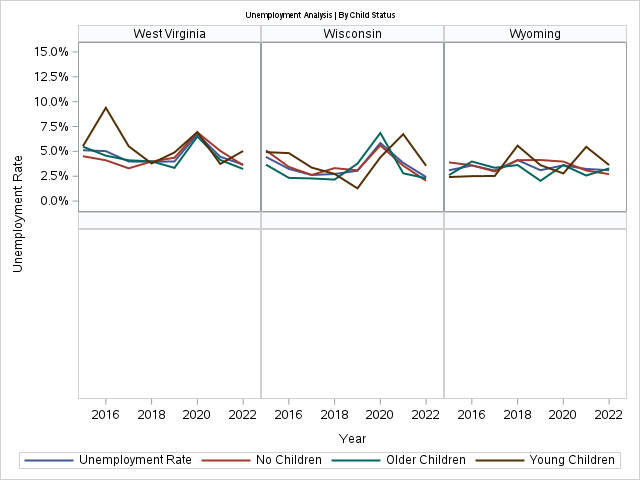

In [7]:
*-----------------------------------------------------------------------------------------*
|		    	   				Unemployment Rate Analysis				  				  | 
*-----------------------------------------------------------------------------------------*;

**********************************************  By Education Level;
title3 h=1.75pct "Unemployment Analysis | By Education Level";
proc sgpanel data=ue;
	where group in ("Unemployment Rate" "EDUC <= HS" "Some College" "College +");
	panelby state_name / columns=3 rows=2 novarname ROWHEADERPOS=right ;
	series y=UE_Rate  x=Year 		/ group=group lineattrs=(thickness=2 pattern=solid);
	keylegend / title="" position=bottom;
	colaxis fitpolicy=thin valuesformat=best5. ;
run;
quit;


**********************************************   By Child Status;
title3 h=1.75pct "Unemployment Analysis | By Child Status";
proc sgpanel data=ue;
	where group in ("Unemployment Rate" "No Children" "Young Children" "Older Children");
	panelby state_name / columns=3 rows=2 novarname ROWHEADERPOS=right ;
	series y=UE_Rate  x=Year 		/ group=group lineattrs=(thickness=2 pattern=solid);
	keylegend / title="" position=bottom;
	colaxis fitpolicy=thin valuesformat=best5. ;
run;
quit;

#### Labor Force Participation
Now that we're in the coding spirit of things, let's also run the LFP analysis.  We can then share our deep thoughts on the entire analysis.


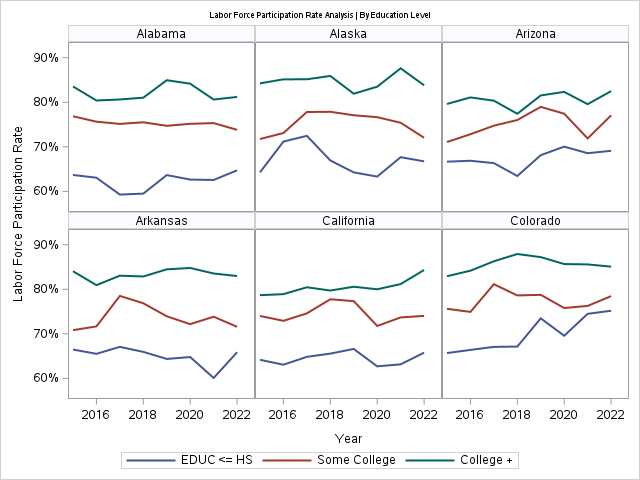
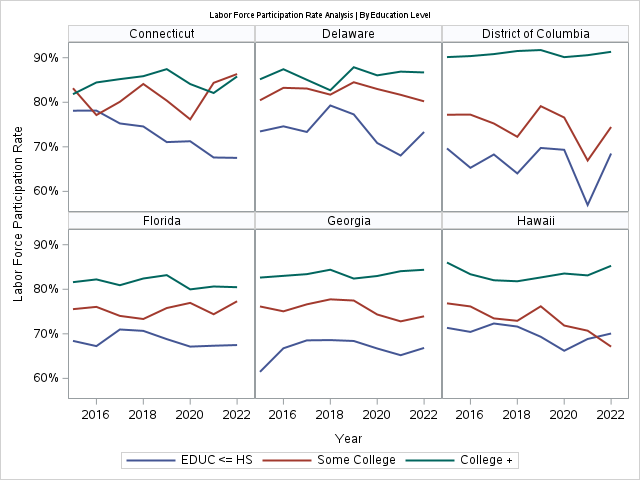
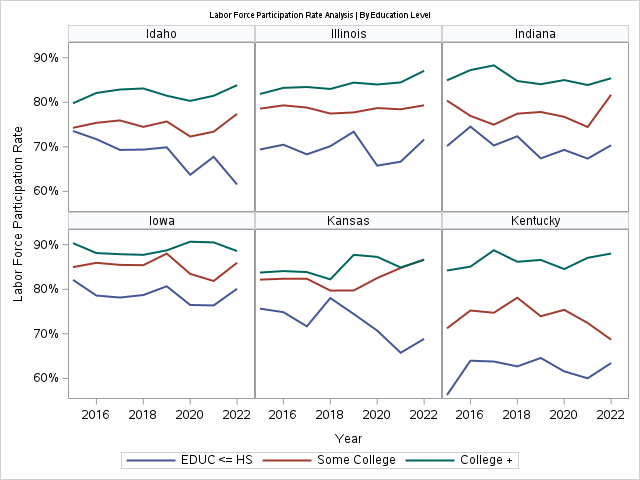
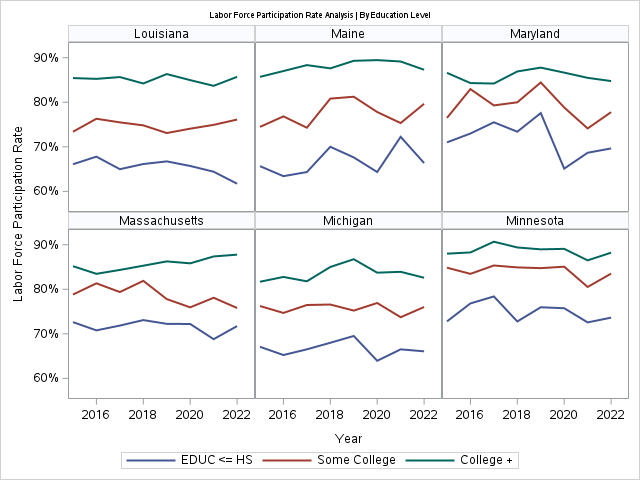
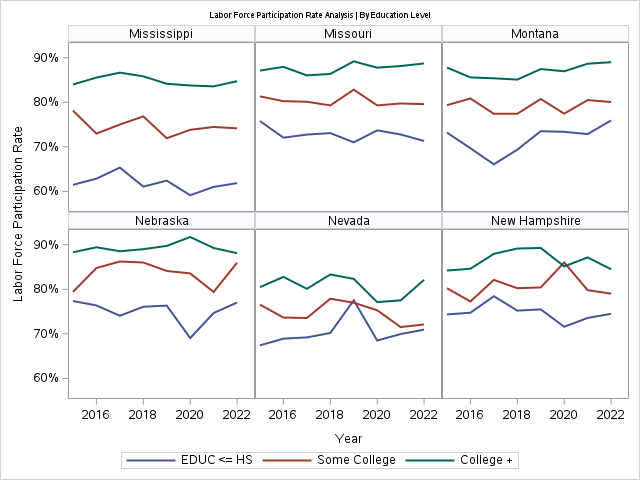
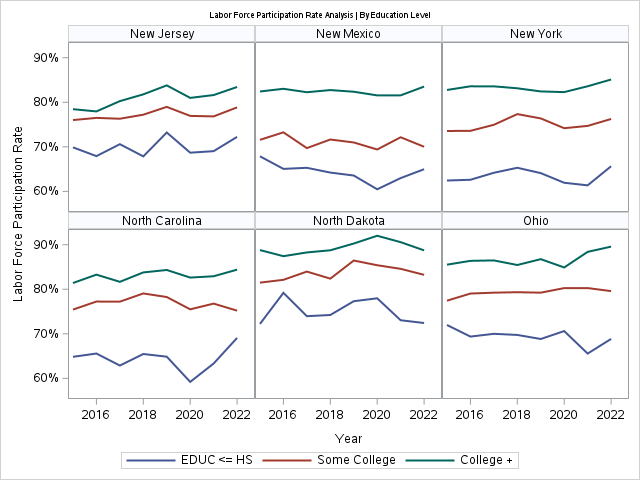
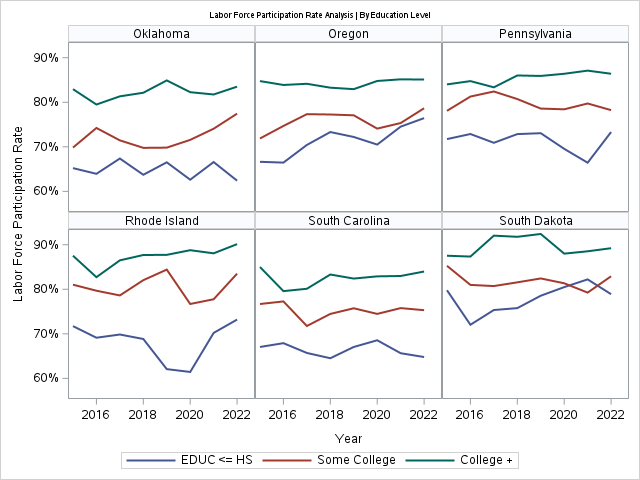
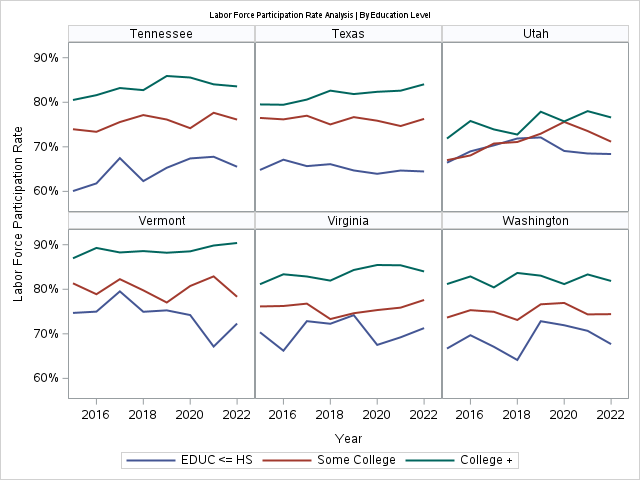
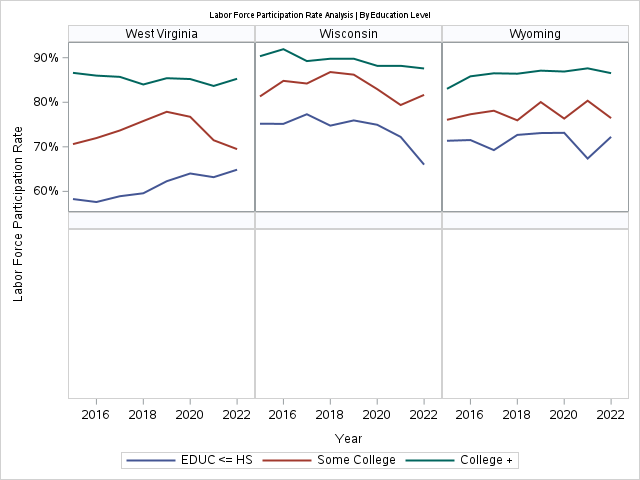
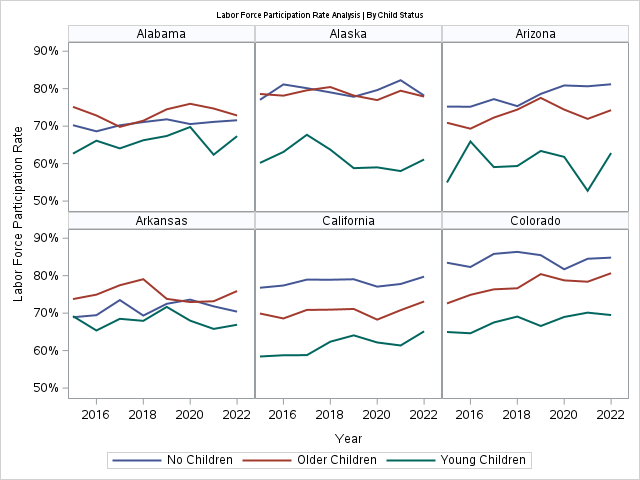
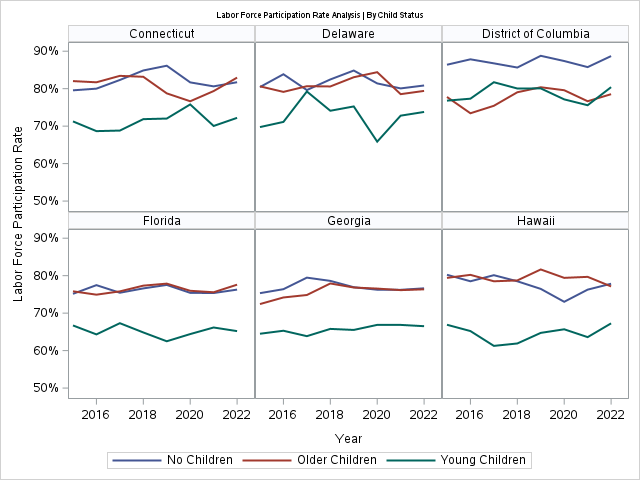
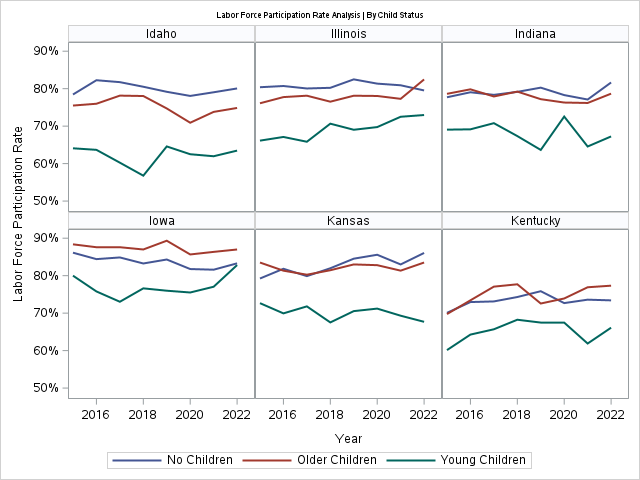
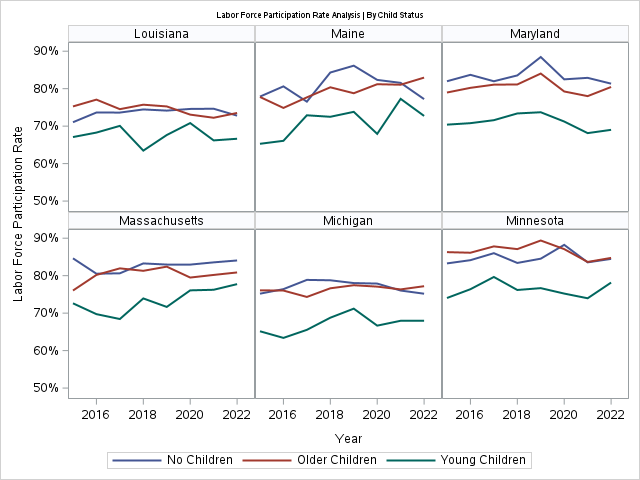
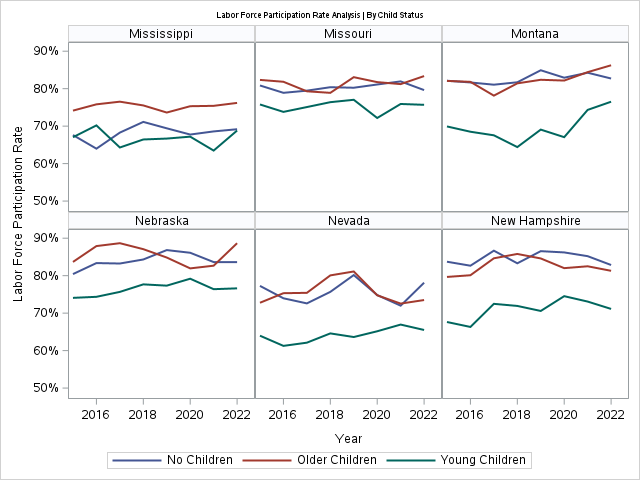
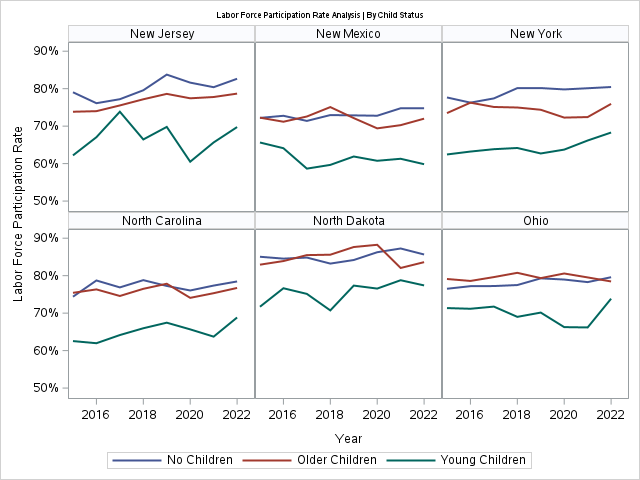
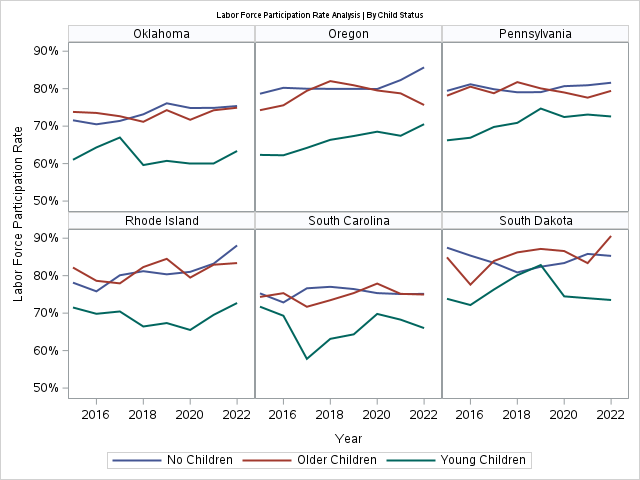
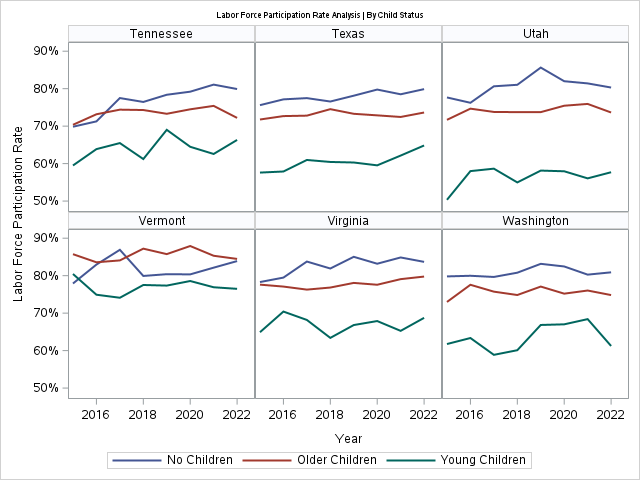
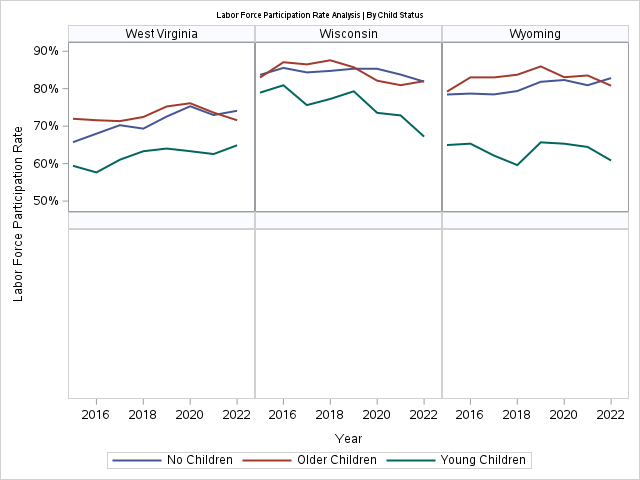

In [8]:
*-----------------------------------------------------------------------------------------*
|		    	   						LFP Rate Analysis				  				  | 
*-----------------------------------------------------------------------------------------*;
	  
**********************************************  By Education Level;
title3 h=1.75pct "Labor Force Participation Rate Analysis | By Education Level";
proc sgpanel data=lfp;
	where group in ("Labor Force Participation Rate Rate" "EDUC <= HS" "Some College" "College +");
	panelby state_name / columns=3 rows=2 novarname ROWHEADERPOS=right ;
	series y=lfp_Rate  x=Year 		/ group=group lineattrs=(thickness=2 pattern=solid);
	keylegend / title="" position=bottom;
	colaxis fitpolicy=thin valuesformat=best5. ;
run;
quit;


**********************************************   By Child Status;
title3 h=1.75pct "Labor Force Participation Rate Analysis | By Child Status";
proc sgpanel data=lfp;
	where group in ("Labor Force Participation Rate Rate" "No Children" "Young Children" "Older Children");
	panelby state_name / columns=3 rows=2 novarname ROWHEADERPOS=right ;
	series y=lfp_Rate  x=Year 		/ group=group lineattrs=(thickness=2 pattern=solid);
	keylegend / title="" position=bottom;
	colaxis fitpolicy=thin valuesformat=best5. ;
run;
quit;

My deep thoughts: UE and LFP rates differ markedly across states and demographic groups. But nearly all trends appear to have reverted to their pre-COVID trends.

#### Part 2 Recap

If the labor market has returned to pre-COVID conditions, there likely isn't a need to design programs to combat the effects of COVID.  Because the market already handled that. Now if there are other issues policymakers want to address, like making it easier for mothers with small children to enter the labor force, that's an entirely separate topic for another time.

And what do you see - our new policymaker extraordinaire?  Do you agree?